In [194]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import seaborn as sns

In [195]:
from sklearn import metrics
from sklearn.model_selection import ParameterGrid
from sklearn.cluster import KMeans

In [196]:
def print_score(data,model_labels, labels):
    print('homo\tcompl\tv-meas\tARI\tAMI\tsilhouette')

    print(50* '-')

    print('%.3f\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f'
    %(metrics.homogeneity_score(labels,model_labels),
    metrics.completeness_score(labels,model_labels),
    metrics.v_measure_score(labels,model_labels),
    metrics.adjusted_rand_score(labels,model_labels),
    metrics.adjusted_mutual_info_score(labels,model_labels),
    metrics.silhouette_score(data,model_labels)))

In [197]:
df_RFM = pd.read_csv('RFM_OList_Data.csv')
print(alldata.shape,df_RFM.shape)
print(alldata.columns)
print(df_RFM.columns)

(97616, 9) (97616, 11)
Index(['customer_id', 'order_item_id', 'amount_prod_categories', 'price',
       'freight_value', 'payment_value', 'review_score', 'frequency',
       'recency'],
      dtype='object')
Index(['Unnamed: 0', 'index', 'customer_id', 'frequency', 'recency',
       'monetary_value', 'R', 'F', 'M', 'RFM Score', 'Segment'],
      dtype='object')


In [198]:
df_RFM.drop(columns=['Unnamed: 0','index','customer_id'],inplace=True)

In [199]:
df_RFM.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97616 entries, 0 to 97615
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   frequency       97616 non-null  int64  
 1   recency         97616 non-null  int64  
 2   monetary_value  97616 non-null  float64
 3   R               97616 non-null  int64  
 4   F               97616 non-null  int64  
 5   M               97616 non-null  int64  
 6   RFM Score       97616 non-null  int64  
 7   Segment         97616 non-null  object 
dtypes: float64(1), int64(6), object(1)
memory usage: 6.0+ MB


In [200]:
df_RFM.sample(10)

,frequency,recency,monetary_value,R,F,M,RFM Score,Segment
64906,1,139,69.85,4,1,2,412,promising
56510,1,118,99.90,4,1,3,413,promising
84072,1,81,117.36,5,1,3,513,new customers
4283,2,157,755.12,4,5,5,455,loyal customers
67512,1,261,913.70,3,1,5,315,about to sleep
88326,1,164,279.10,4,1,5,415,promising
50791,1,320,60.85,2,1,2,212,hibernating
90081,1,279,194.48,2,1,4,214,hibernating
79584,1,397,263.78,1,1,5,115,hibernating
8765,2,109,36.74,4,5,1,451,loyal customers


In [201]:
df_RFM['Segment'].unique()

array(["can't lose", 'loyal customers', 'champions', 'hibernating',
       'new customers', 'promising', 'about to sleep'], dtype=object)

In [202]:
def plot_3_feature(df,features):
    fig = plt.figure(figsize=(12,8))
    ax = fig.gca(projection='3d')
    x = df[features[0]]
    y = df[features[1]]
    z =df[features[2]]
    ax.scatter(x,y,z)
    ax.set_xlabel(str(features[0]))
    ax.set_ylabel(str(features[1]))
    ax.set_zlabel(str(features[2]))
    plt.show

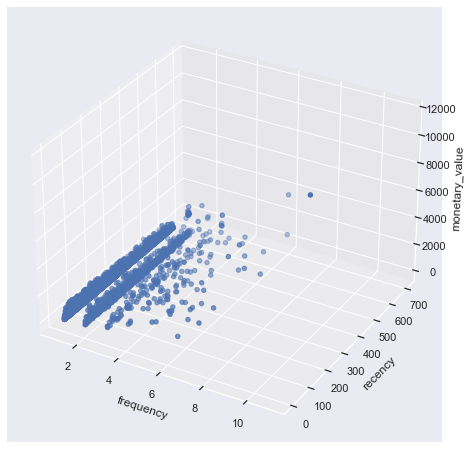

In [203]:
features = ['frequency','recency','monetary_value']
df_sample = df_RFM.sample(frac=0.1).reset_index(drop=True)
plot_3_feature(df_sample,features)

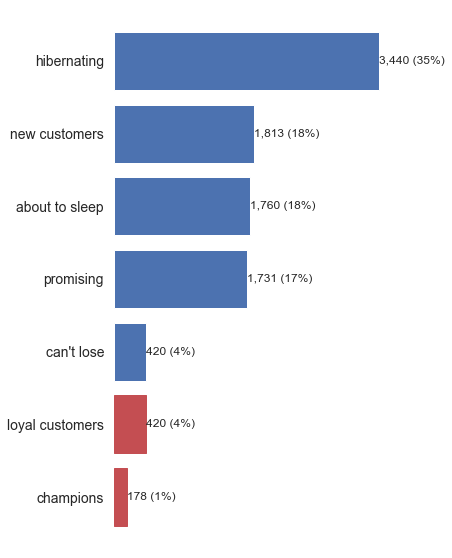

In [204]:
segments_counts = df_sample['Segment'].value_counts().sort_values(ascending=True)

fig, ax = plt.subplots()

bars = ax.barh(range(len(segments_counts)),
              segments_counts,
              color='b')
ax.set_frame_on(False)
ax.tick_params(left=False,
               bottom=False,
               labelbottom=False)
ax.set_yticks(range(len(segments_counts)))
ax.set_yticklabels(segments_counts.index,  fontsize = 14)

for i, bar in enumerate(bars):
        value = bar.get_width()
        if segments_counts.index[i] in ['champions', 'loyal customers']:
            bar.set_color('r')
        ax.text(value,
                bar.get_y() + bar.get_height()/2,
                '{:,} ({:}%)'.format(int(value),
                                   int(value*100/segments_counts.sum())),
                va='center',
                ha='left'
               )
sns.set(rc={'figure.figsize':(5,10)})
plt.show()

In [205]:
#Target customer into base on point in Recency and Frequency 
#{
#   '[1-2][1-2]': 'hibernating',
#   '[1-2][3-4]': 'at risk',
#   '[1-2]5': 'can't lose',
#   '3[1-2]': 'about to sleep',
#   '33': 'need attention',
#   '[3-4][4-5]': 'loyal customers',
#   '41': 'promising',
#   '51': 'new customers',
#   '[4-5][2-3]': 'potential loyalists',
#   '5[4-5]': 'champions'
#}

In [206]:
df_sample['Segment'].unique()

array(["can't lose", 'promising', 'hibernating', 'about to sleep',
       'new customers', 'champions', 'loyal customers'], dtype=object)

In [207]:
df_sample.head()

,frequency,recency,monetary_value,R,F,M,RFM Score,Segment
0,2,382,467.36,2,5,5,255,can't lose
1,1,130,146.04,4,1,4,414,promising
2,1,425,68.89,1,1,2,112,hibernating
3,1,274,172.22,3,1,4,314,about to sleep
4,1,163,46.13,4,1,1,411,promising


In [208]:
ecomerces_features = df_sample[['frequency','recency','monetary_value']]
ecomerces_features.head()

,frequency,recency,monetary_value
0,2,382,467.36
1,1,130,146.04
2,1,425,68.89
3,1,274,172.22
4,1,163,46.13


In [209]:
from sklearn import preprocessing
label_encoding = preprocessing.LabelEncoder()

ecomerces_target = df_sample['Segment']
ecomerces_target = label_encoding.fit_transform(ecomerces_target)

In [210]:
kmeans_model = KMeans(n_clusters=7).fit(ecomerces_features)

In [211]:
kmeans_model.labels_[:100]

array([4, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 4, 0, 1,
       4, 1, 0, 1, 1, 1, 4, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 6, 0, 0,
       1, 0, 0, 1, 6, 0, 0, 0, 4, 4, 3, 1, 1, 0, 0, 1, 0, 4, 4, 0, 3, 0,
       1, 0, 3, 0, 0, 1, 0, 1, 1, 0, 1, 0, 4, 1, 4, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 3, 1, 0, 3, 0, 1, 0])

In [212]:
print_score(ecomerces_features,kmeans_model.labels_,ecomerces_target)

homo	compl	v-meas	ARI	AMI	silhouette
--------------------------------------------------
0.379	0.549	0.448	0.449	0.448	0.454


In [213]:
# Try with Parameter Grid

In [214]:
Parameters = {'n_clusters' : [2,3,4,5,6,8,10]}

parameters_grid = ParameterGrid(Parameters)

In [215]:
list(parameters_grid)

[{'n_clusters': 2},
 {'n_clusters': 3},
 {'n_clusters': 4},
 {'n_clusters': 5},
 {'n_clusters': 6},
 {'n_clusters': 8},
 {'n_clusters': 10}]

In [216]:
best_score = -1
model = KMeans()

In [217]:
for g in parameters_grid:
    model.set_params(**g)
    model.fit(ecomerces_features)

    ss = metrics.silhouette_score(ecomerces_features,model.labels_)
    print('Parameter: ', g, 'Score: ',ss)
    if ss > best_score:
        best_score = ss
        best_grid = g

Parameter:  {'n_clusters': 2} Score:  0.8920358480584125
Parameter:  {'n_clusters': 3} Score:  0.6576060470499968
Parameter:  {'n_clusters': 4} Score:  0.44206004889176176
Parameter:  {'n_clusters': 5} Score:  0.4540977320682256
Parameter:  {'n_clusters': 6} Score:  0.45589235462392574
Parameter:  {'n_clusters': 8} Score:  0.39689342408085143
Parameter:  {'n_clusters': 10} Score:  0.40597387960381676


In [218]:
# Because Parameter:  {'n_clusters': 3} Score:  0.6538804425271577
# I cluster into 3 goups 
#Target customer into base on point in Recency and Frequency 
#{
#   '[1-2][1-2]': 'hibernating','3[1-2]': 'about to sleep'
# => group with Non-active


#   '41': 'promising',
#   '51': 'new customers',
# => group with promissing

#   '[1-2]5': 'can't lose',
#   '[3-4][4-5]': 'loyal customers',
#   '5[4-5]': 'champions'
#}

In [219]:
def create_new_target(df_sample):
    df_new_group_1_index = df_sample[(df_sample['Segment'] == 'hibernating') | (df_sample['Segment'] == 'about to sleep')].index

    df_new_group_2_index = df_sample[(df_sample['Segment'] == 'promising') | (df_sample['Segment'] == 'new customers')].index

    df_new_group_3_index = df_sample[(df_sample['Segment'] == 'can\'t lose') | (df_sample['Segment'] == 'loyal customers') | (df_sample['Segment'] == 'champions')].index
    df_sample.loc[df_new_group_1_index,'Segment'] = 'Non-active'
    df_sample.loc[df_new_group_2_index,'Segment'] = 'promissing'
    df_sample.loc[df_new_group_3_index,'Segment'] = 'active'

In [220]:
df_new_sample = df_sample

In [221]:
create_new_target(df_new_sample)

In [222]:
df_new_sample['Segment'].unique()

array(['active', 'promissing', 'Non-active'], dtype=object)

In [223]:
df_new_sample.head()

,frequency,recency,monetary_value,R,F,M,RFM Score,Segment
0,2,382,467.36,2,5,5,255,active
1,1,130,146.04,4,1,4,414,promissing
2,1,425,68.89,1,1,2,112,Non-active
3,1,274,172.22,3,1,4,314,Non-active
4,1,163,46.13,4,1,1,411,promissing


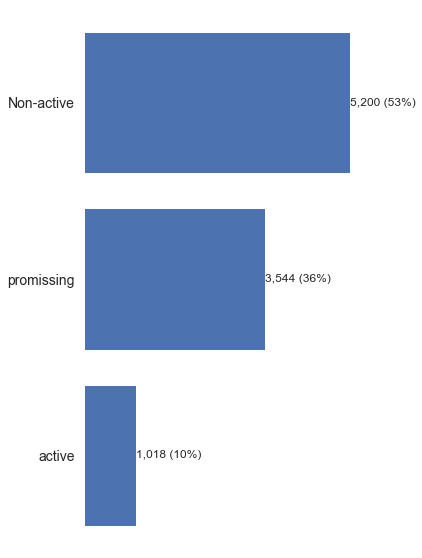

In [224]:
segments_counts = df_new_sample['Segment'].value_counts().sort_values(ascending=True)

fig, ax = plt.subplots()

bars = ax.barh(range(len(segments_counts)),
              segments_counts,
              color='b')
ax.set_frame_on(False)
ax.tick_params(left=False,
               bottom=False,
               labelbottom=False)
ax.set_yticks(range(len(segments_counts)))
ax.set_yticklabels(segments_counts.index,  fontsize = 14)

for i, bar in enumerate(bars):
        value = bar.get_width()
        if segments_counts.index[i] in ['champions', 'loyal customers']:
            bar.set_color('r')
        ax.text(value,
                bar.get_y() + bar.get_height()/2,
                '{:,} ({:}%)'.format(int(value),
                                   int(value*100/segments_counts.sum())),
                va='center',
                ha='left'
               )
sns.set(rc={'figure.figsize':(5,10)})
plt.show()

In [225]:
ecomerces_features = df_sample[['frequency','recency','monetary_value']]
ecomerces_features.head()

,frequency,recency,monetary_value
0,2,382,467.36
1,1,130,146.04
2,1,425,68.89
3,1,274,172.22
4,1,163,46.13


In [226]:
ecomerces_target = df_sample['Segment']
ecomerces_target = label_encoding.fit_transform(ecomerces_target)

In [227]:
kmeans_model_3_F = KMeans(n_clusters=3).fit(ecomerces_features)

In [237]:
print_score(ecomerces_features,kmeans_model_3_F.labels_,ecomerces_target)

homo	compl	v-meas	ARI	AMI	silhouette
--------------------------------------------------
0.059	0.203	0.091	0.088	0.091	-0.017


In [229]:
# Just Use Frequency and recency to cluster

In [238]:
ecomerces_features = df_sample[['frequency','recency']]
kmeans_model_2_F = KMeans(n_clusters=3).fit(ecomerces_features)
print_score(ecomerces_features,kmeans_model_2_F.labels_,ecomerces_target)

homo	compl	v-meas	ARI	AMI	silhouette
--------------------------------------------------
0.558	0.486	0.519	0.503	0.519	0.574


In [242]:
#Just Use Frequency and Monetary_value to cluster

In [243]:
ecomerces_features = df_sample[['frequency','monetary_value']]
kmeans_model_2_F_F_R = KMeans(n_clusters=3).fit(ecomerces_features)
print_score(ecomerces_features,kmeans_model_2_F.labels_,ecomerces_target)

homo	compl	v-meas	ARI	AMI	silhouette
--------------------------------------------------
0.558	0.486	0.519	0.503	0.519	-0.033


In [244]:
#Just Use Recency and Monetary_value to cluster

In [245]:
ecomerces_features = df_sample[['recency','monetary_value']]
kmeans_model_2_F_F_R = KMeans(n_clusters=3).fit(ecomerces_features)
print_score(ecomerces_features,kmeans_model_2_F.labels_,ecomerces_target)

homo	compl	v-meas	ARI	AMI	silhouette
--------------------------------------------------
0.558	0.486	0.519	0.503	0.519	0.270


In [231]:
# Just use Frequency to Cluster

In [240]:
ecomerces_features = df_sample[['frequency']]
kmeans_model_1_F_Fre = KMeans(n_clusters=3).fit(ecomerces_features)
print_score(ecomerces_features,kmeans_model_1_F_Fre.labels_,ecomerces_target)

homo	compl	v-meas	ARI	AMI	silhouette
--------------------------------------------------
0.356	0.909	0.512	0.288	0.512	0.979


In [233]:
# Just use Recency to Cluster

In [241]:
ecomerces_features = df_sample[['recency']]
kmeans_model_1_F_re = KMeans(n_clusters=3).fit(ecomerces_features)
print_score(ecomerces_features,kmeans_model_1_F_re.labels_,ecomerces_target)

homo	compl	v-meas	ARI	AMI	silhouette
--------------------------------------------------
0.552	0.481	0.514	0.498	0.514	0.574


In [247]:
# Test sample

Test_set = df_RFM.sample(100).reset_index(drop=True)
create_new_target(Test_set)

In [248]:
Test_set.head()

,frequency,recency,monetary_value,R,F,M,RFM Score,Segment
0,1,95,43.70,5,1,1,511,promissing
1,1,418,325.93,1,1,5,115,Non-active
2,1,280,70.05,2,1,2,212,Non-active
3,1,693,613.78,1,1,5,115,Non-active
4,3,174,902.40,4,5,5,455,active


In [250]:
Test_set_features = Test_set.drop(columns=['monetary_value','R','F','M','RFM Score','Segment'])

In [251]:
Test_set_features.head(10)

,frequency,recency
0,1,95
1,1,418
2,1,280
3,1,693
4,3,174
5,1,246
6,1,397
7,1,165
8,1,355
9,1,175


In [253]:
y_pred = kmeans_model_2_F.predict(Test_set_features)

In [254]:
y_pred = label_encoding.inverse_transform(y_pred)

In [259]:
compare_results = pd.DataFrame({'y_pred':y_pred,'target':Test_set['Segment'].values})

compare_results.head(20)

,y_pred,target
0,promissing,promissing
1,active,Non-active
2,Non-active,Non-active
3,active,Non-active
4,promissing,active
5,Non-active,Non-active
6,active,Non-active
7,promissing,promissing
8,Non-active,Non-active
9,Non-active,promissing
